# Cargamos las librerias

In [265]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Fuente de la base de datos

Se uso la base de datos : https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

Para realizar el analis de sus datos, no se tiene mucho contexto del origen de los datos pero en este informe trataremos de dar un contexto estadistico y de acuerdo a la informacion de los datos contenidos en esta fuente:     

 1. Nombre de las columnas :

| Nombre de la Columna | Descripción         |
|:--------------------:|:-------------------:|
| age                  | Edad                |
| work_class           | Clase de trabajo    |
| fnlwgt               | Peso final          |
| education            | Educación           |
| education_num        | Número de educación |
| marital              | Estado civil        |
| occupation           | Ocupación           |
| relationship         | Relación            |
| race                 | Raza                |
| sex                  | Sexo                |
| capital_gain         | Ganancia de capital |
| capital_loss         | Pérdida de capital  |
| hours_week           | Horas por semana    |
| native_country       | País de origen      |
| label                | Etiqueta            |


In [244]:
columns = [
    "age",
    "work_class",
    "fnlwgt",
    "education",
    "education_num",
    "marital",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital_gain",
    "capital_loss",
    "hours_week",
    "native_country",
    "label"
]

# Cargue de la base de datos en Pandas

In [245]:
data_url =  'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

df_adults = pd.read_csv(data_url, delimiter=',', names=columns)
df_adults.head()

,age,work_class,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hours_week,native_country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Informacion sobre mi data frame y sus variables principales

In [246]:
num_rows, num_column = df_adults.shape

print("Numero de filas : ", num_rows)
print("Numero de Columnas : ", num_column)

Numero de filas :  32561
Numero de Columnas :  15


In [247]:
print("Tipo de datos de las variables del dataframe : \n ")
df_adults.info()

Tipo de datos de las variables del dataframe : 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   work_class      32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital         32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_week      32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  label           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Tipos de datos de las variables :

| Nombre de la Columna | Tipo de Dato  | Descripción         | Tipo         | Ejemplo       | Detalle del Tipo         |
|:--------------------:|:-------------:|:-------------------:|:------------:|:-------------:|:------------------------:|
| age                  | int           | Edad                | Numérica     | 39            | Numérica continua        |
| work_class           | str           | Clase de trabajo    | Categórica   | Private       | Categórica nominal       |
| fnlwgt               | int           | Peso final          | Numérica     | 77516         | Numérica continua        |
| education            | str           | Educación           | Categórica   | Bachelors     | Categórica nominal       |
| education_num        | int           | Número de educación | Numérica     | 13            | Numérica discreta        |
| marital              | str           | Estado civil        | Categórica   | Never-married | Categórica nominal       |
| occupation           | str           | Ocupación           | Categórica   | Adm-clerical  | Categórica nominal       |
| relationship         | str           | Relación            | Categórica   | Not-in-family | Categórica nominal       |
| race                 | str           | Raza                | Categórica   | White         | Categórica nominal       |
| sex                  | str           | Sexo                | Categórica   | Male          | Categórica nominal       |
| capital_gain         | int           | Ganancia de capital | Numérica     | 2174          | Numérica continua        |
| capital_loss         | int           | Pérdida de capital  | Numérica     | 0             | Numérica continua        |
| hours_week           | int           | Horas por semana    | Numérica     | 40            | Numérica continua        |
| native_country       | str           | País de origen      | Categórica   | United-States | Categórica nominal       |
| label                | str           | Etiqueta            | Categórica   | <=50K         | Categórica nominal       |

# Medidas de tendencia central de los datos sin procesar



In [248]:
df_adults.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Tratamiento de datos missing, NaN o None

En este dataframe tenemos que los datos NaN estan representandos por el caracter '?', por consiguiente procederemos primeramente a limpiar este campo convirtiendolo en un campo de tipo NaN

In [249]:
# verificamos qie registros tienen un '?' en algun campo
columnas_str = df_adults.select_dtypes(include=['object']).columns

# Crear un filtro booleano para identificar las filas que contienen '?'
filter = df_adults[columnas_str].apply(lambda x: x.str.contains('\?', na=False)).any(axis=1)

# Aplicar el filtro para obtener las filas que cumplen con la condición
invalid_registers, _ = df_adults[filter].shape

print("Registros invalidos : ",  invalid_registers)


Registros invalidos :  2399


In [250]:
print('Antes del cambio :',df_adults.loc[27, 'work_class'])
# Cambiarmos los signos de interrogacion por valors NaN de Pandas
columnas_str = df_adults.select_dtypes(include=['object']).columns

# Eliminar espacios adicionales alrededor del signo de interrogación
df_adults[columnas_str] = df_adults[columnas_str].apply(lambda x: x.str.strip())

# Reemplazar los valores '?' por NaN
df_adults[columnas_str] = df_adults[columnas_str].replace('?', pd.NA)
print('Despues del cambio : ', df_adults.loc[27, 'work_class'])

# Preguntamos cuantos signos de interrogacion tenemos nuevamente :

invalid_registers, _ = df_adults[filter].shape
print("Registros invalidos : ",  invalid_registers)

Antes del cambio :  ?
Despues del cambio :  <NA>
Registros invalidos :  2399


# Luego de limpiar los datos, pasamos a eliminar esos datos NaN para evitar que nos generen lecturas erroneas de información

In [251]:
# Eliminamos las filas con registros nulos para evitar ruido en los datos

df_adults.dropna(axis=0, inplace=True, how="any")
new_num_rows, _ = df_adults.shape

print("Numero de filas viejo: ", num_rows)
print("Numero de filas nuevo: ", new_num_rows)

# Validamos que los registros eliminados son los mismos que los que son invalidos

print("Registros Eliminados : ", num_rows- new_num_rows, (num_rows- new_num_rows) == invalid_registers)

Numero de filas viejo:  32561
Numero de filas nuevo:  30162
Registros Eliminados :  2399 True


# Eliminacion de duplicados

In [260]:
df_adults.drop_duplicates()

final_rows, _ = df_adults.shape

print("Registros Repetidos Eliminados :", final_rows - new_num_rows)
df_adults

Registros Repetidos Eliminados : 0


,age,work_class,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hours_week,native_country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Volvemos a calcular todas las medidias de tendencia central pero esta vez usaremois la libreria de numpy

In [264]:
columnas_numericas = df_adults.select_dtypes(include=[np.number])

# Calcular estadísticas básicas utilizando NumPy
media = np.mean(columnas_numericas, axis=0)
mediana = np.median(columnas_numericas, axis=0)
desviacion_estandar = np.std(columnas_numericas, axis=0)
minimo = np.min(columnas_numericas, axis=0)
maximo = np.max(columnas_numericas, axis=0)

# Imprimir los resultados
print("\nMedia:\n", media)
print("\nMediana:\n", mediana)
print("\nDesviación Estándar:\n", desviacion_estandar)
print("\nMínimo:\n", minimo)
print("\nMáximo:\n", maximo)


Media:
 age                  38.437902
fnlwgt           189793.833930
education_num        10.121312
capital_gain       1092.007858
capital_loss         88.372489
hours_week           40.931238
dtype: float64

Mediana:
 [3.70000e+01 1.78425e+05 1.00000e+01 0.00000e+00 0.00000e+00 4.00000e+01]

Desviación Estándar:
 age                  13.134447
fnlwgt           105651.220089
education_num         2.549953
capital_gain       7406.223720
capital_loss        404.291668
hours_week           11.979786
dtype: float64

Mínimo:
 age                 17
fnlwgt           13769
education_num        1
capital_gain         0
capital_loss         0
hours_week           1
dtype: int64

Máximo:
 age                   90
fnlwgt           1484705
education_num         16
capital_gain       99999
capital_loss        4356
hours_week            99
dtype: int64


# Ahora algunas graficas para ver el comportamiento de estas variables

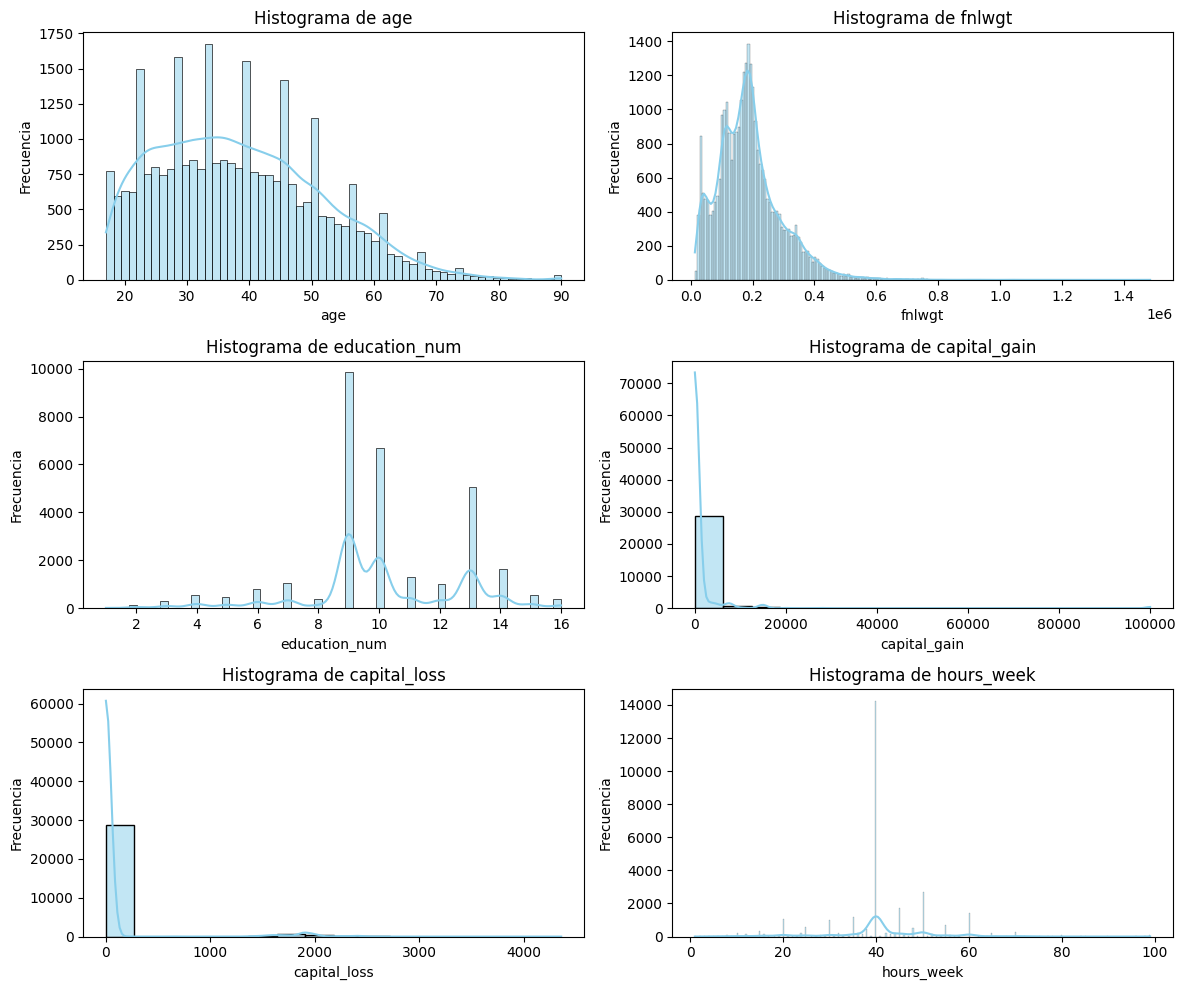

In [277]:
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 10))

# Crear subgráficos para cada variable
variables = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_week']
for i, variable in enumerate(variables, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df_adults[variable], kde=True, color='skyblue')
    plt.title(f'Histograma de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')

# Ajustar el diseño de los subgráficos
plt.tight_layout()
plt.show()

<ipython-input-269-d8e03c51b681>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='work_class', data=df_adults, palette='Set2')


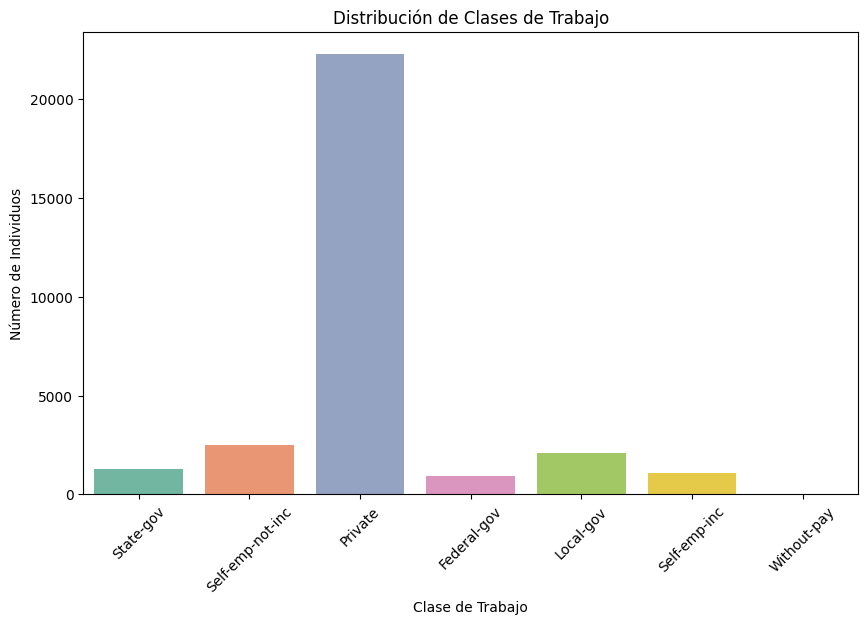

In [269]:
# Gráfico de barras para la clase de trabajo
plt.figure(figsize=(10, 6))
sns.countplot(x='work_class', data=df_adults, palette='Set2')
plt.title('Distribución de Clases de Trabajo')
plt.xlabel('Clase de Trabajo')
plt.ylabel('Número de Individuos')
plt.xticks(rotation=45)
plt.show()

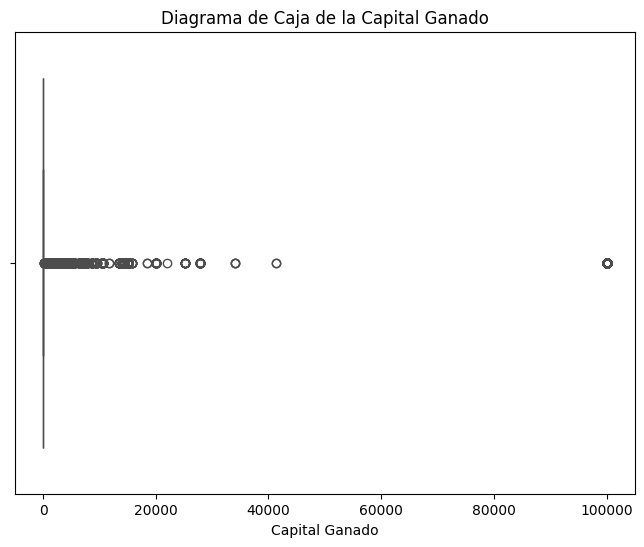

In [272]:
# Diagrama de caja para la capital ganada
plt.figure(figsize=(8, 6))
sns.boxplot(x='capital_gain', data=df_adults, orient='h', color='red')
plt.title('Diagrama de Caja de la Capital Ganado')
plt.xlabel('Capital Ganado')
plt.show()

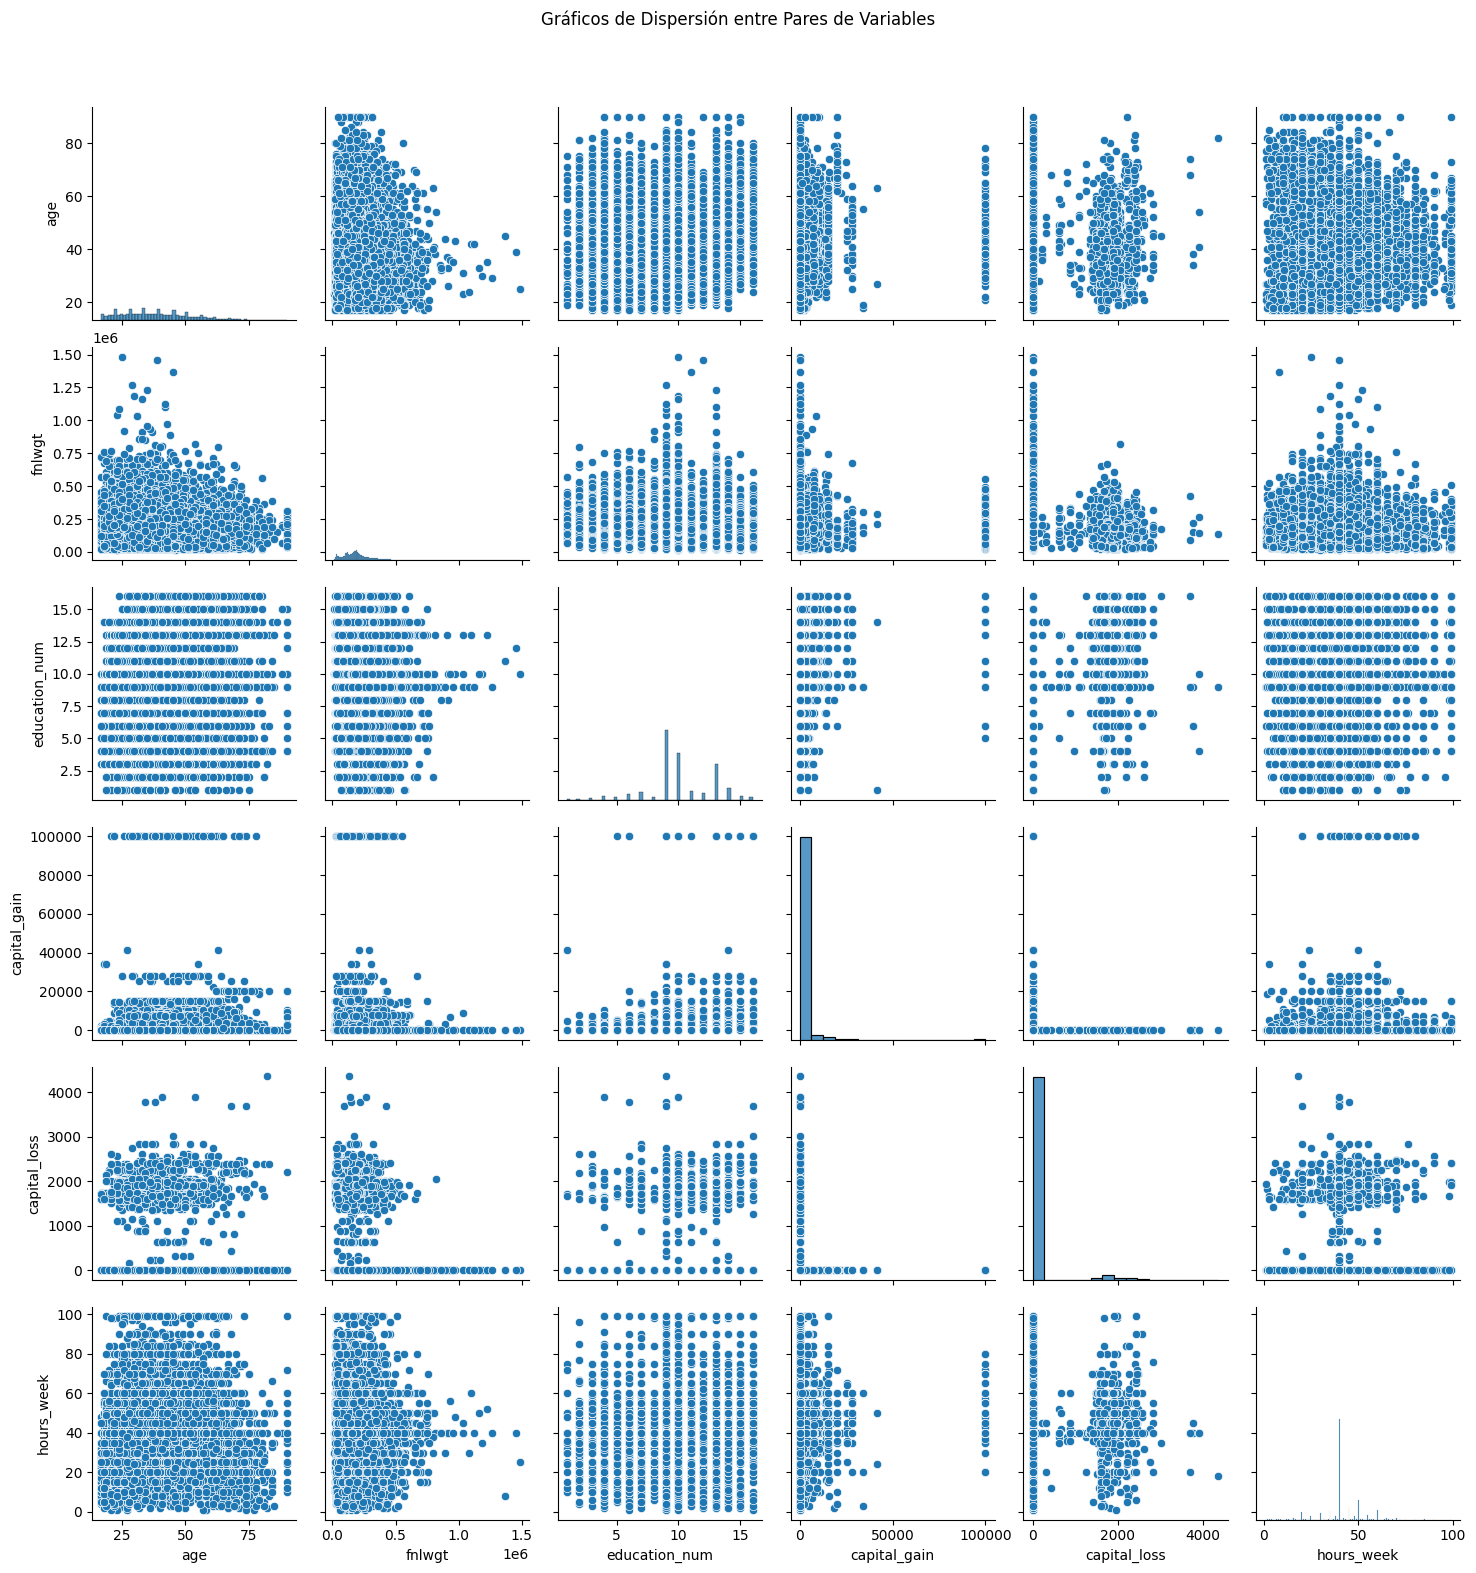

In [283]:
# Crear una matriz de gráficos de dispersión entre pares de variables
sns.pairplot(df_adults[['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_week']])
plt.suptitle('Gráficos de Dispersión entre Pares de Variables', y=1.05)
plt.show()